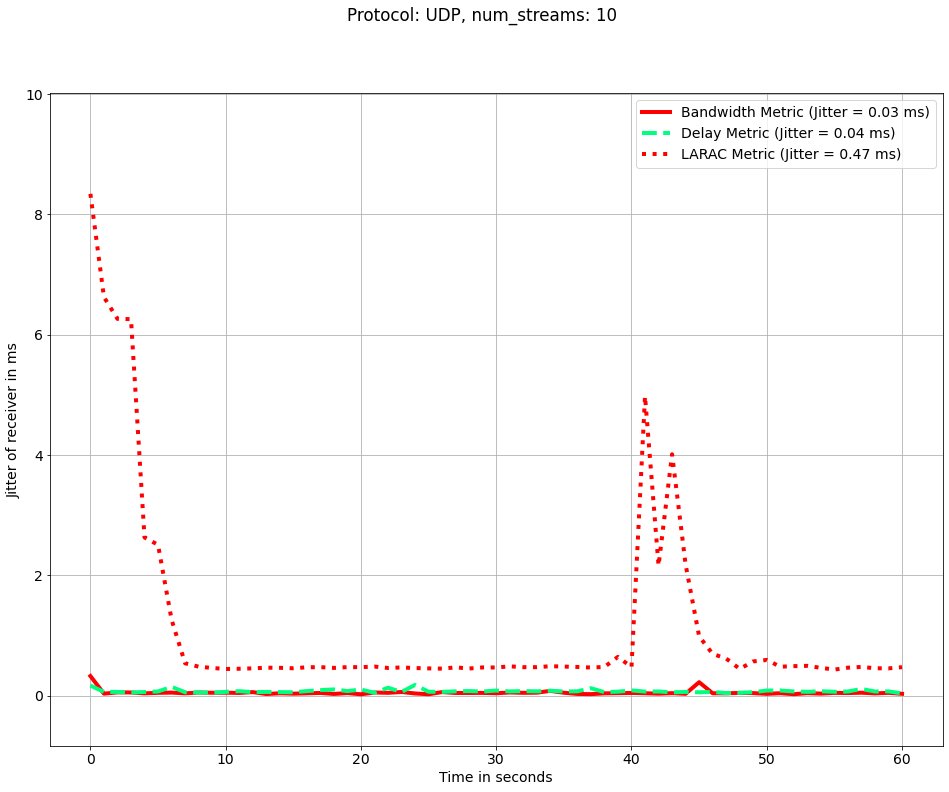

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
f2=open("receiver_bandwidth.json","w")
f2.truncate(0)
lines = []
with open('receiver_bandwidth.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

f2=open("receiver_delay.json","w")
f2.truncate(0)
lines = []
with open('receiver_delay.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

f2=open("receiver_larac.json","w")
f2.truncate(0)
lines = []
with open('receiver_larac.txt') as f1:
    for line in f1:
        lines.append(line)
f1.close
for line in lines[:-11]:
    f2.write(line)
f2.close()

font = {'size'   : 14}
matplotlib.rc('font', **font)
width = 0.3
fig = plt.figure(figsize=(16,12))
receiver_bandwidth= json.load(open('receiver_bandwidth.json', 'r'))
receiver_delay = json.load(open('receiver_delay.json', 'r'))
receiver_larac = json.load(open('receiver_larac.json', 'r'))
yAxis_1 = []
for intervals in receiver_bandwidth["intervals"]:
    yAxis_1.append(intervals["sum"]["jitter_ms"])
yAxis_2 = []
for intervals in receiver_delay["intervals"]:
    yAxis_2.append(intervals["sum"]["jitter_ms"])
yAxis_3 = []
for intervals in receiver_larac["intervals"]:
    yAxis_3.append(intervals["sum"]["jitter_ms"])
avr_1 = round(receiver_bandwidth["end"]["sum"]["jitter_ms"],2)
avr_2 = round(receiver_delay["end"]["sum"]["jitter_ms"],2)
avr_3 = round(receiver_larac["end"]["sum"]["jitter_ms"],2)
plt.ylim(0-max([max(yAxis_1),max(yAxis_2),max(yAxis_3)])*0.1,max([max(yAxis_1),max(yAxis_2),max(yAxis_3)])*1.2)
plt.xlabel('Time in seconds')
plt.ylabel('Jitter of receiver in ms')
plt.plot(yAxis_1, label = "Bandwidth Metric (Jitter = "+str(avr_1)+" ms)", linewidth = '4', color='red')
plt.plot(yAxis_2, label = "Delay Metric (Jitter = "+str(avr_2)+" ms)", linewidth = '4', color='springgreen',linestyle = 'dashed')
plt.plot(yAxis_3, label = "LARAC Metric (Jitter = "+str(avr_3)+" ms)", linewidth = '4', color='red', linestyle = "dotted")
plt.legend(loc="upper right")
plt.grid()
_title = "Protocol: "+ receiver_bandwidth["start"]["test_start"]["protocol"]+", "
_title = _title + "num_streams: "+ str(receiver_bandwidth["start"]["test_start"]["num_streams"])
plt.suptitle(_title)
plt.savefig("compare_jitter_"+_title+".png",dpi=200)